<a href="https://colab.research.google.com/github/susmitds/User-Car-Price-Prediction-using-Machine-Learning-Models/blob/main/1_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car=pd.read_csv('D:/Workspace/Projects/UsedCarPricePrediction/Data/vehicles.csv')

In [3]:
car.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
car.drop(["url","id","region_url","image_url","description","lat","long","county","VIN"], axis=1, inplace=True)

In [5]:
car.dropna(inplace = True)

In [6]:
car.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,2021-05-03T14:02:03-0500
55,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,2021-04-29T17:19:18-0500
59,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,2021-04-27T12:20:01-0500
65,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,2021-04-26T11:15:36-0500
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al,2021-04-24T18:39:59-0500


In [7]:
car.shape

(79195, 17)

In [8]:
car['post_month']=car['posting_date'].apply(lambda x : x.split('-')[1])

In [9]:
car.drop("posting_date", axis=1, inplace=True)

In [10]:
car.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,post_month
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,05
55,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,04
59,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,04
65,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,04
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al,04


In [11]:
car['title_status'].unique()

array(['clean', 'rebuilt', 'salvage', 'lien', 'missing', 'parts only'],
      dtype=object)

In [12]:
car['size'].unique()

array(['full-size', 'mid-size', 'compact', 'sub-compact'], dtype=object)

In [13]:
car['condition'].unique()

array(['excellent', 'good', 'like new', 'new', 'fair', 'salvage'],
      dtype=object)

In [14]:
car['title_status']=car['title_status'].replace({'clean':6, 'rebuilt':5, 'salvage':4, 'lien':3, 'missing':2, 'parts only':1})
car['size']=car['size'].replace({'full-size':4, 'compact':1, 'mid-size':3, 'sub-compact':2})
car['condition']=car['condition'].replace({'like new':5, 'excellent':4, 'fair':2, 'good':3, 'new':6, 'salvage':1})

In [15]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79195 entries, 31 to 426836
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        79195 non-null  object 
 1   price         79195 non-null  int64  
 2   year          79195 non-null  float64
 3   manufacturer  79195 non-null  object 
 4   model         79195 non-null  object 
 5   condition     79195 non-null  int64  
 6   cylinders     79195 non-null  object 
 7   fuel          79195 non-null  object 
 8   odometer      79195 non-null  float64
 9   title_status  79195 non-null  int64  
 10  transmission  79195 non-null  object 
 11  drive         79195 non-null  object 
 12  size          79195 non-null  int64  
 13  type          79195 non-null  object 
 14  paint_color   79195 non-null  object 
 15  state         79195 non-null  object 
 16  post_month    79195 non-null  object 
dtypes: float64(2), int64(4), object(11)
memory usage: 10.9+ MB


In [16]:
car.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,post_month
31,auburn,15000,2013.0,ford,f-150 xlt,4,6 cylinders,gas,128000.0,6,automatic,rwd,4,truck,black,al,05
55,auburn,19900,2004.0,ford,f250 super duty,3,8 cylinders,diesel,88000.0,6,automatic,4wd,4,pickup,blue,al,04
59,auburn,14000,2012.0,honda,odyssey,4,6 cylinders,gas,95000.0,6,automatic,fwd,4,mini-van,silver,al,04
65,auburn,22500,2001.0,ford,f450,3,8 cylinders,diesel,144700.0,6,manual,rwd,4,truck,white,al,04
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,4,8 cylinders,gas,90000.0,5,automatic,rwd,3,sedan,grey,al,04


In [17]:
car['cylinders']=car['cylinders'].apply(lambda x : x.split(' ')[0])

In [18]:
car['cylinders'].value_counts()

6        27099
4        26093
8        24041
10         792
5          721
other      250
3          156
12          43
Name: cylinders, dtype: int64

In [19]:
car[car['cylinders']=='other']['price'].mean()

16905.032

In [20]:
car['price'].mean()

79432.7371298693

In [21]:
car['cylinders']=car['cylinders'].replace('other','0')

In [22]:
car['cylinders'].value_counts()

6     27099
4     26093
8     24041
10      792
5       721
0       250
3       156
12       43
Name: cylinders, dtype: int64

In [23]:
car = car.astype({'cylinders':'int64','post_month':'int64','year':'int64','odometer':'int'})

In [24]:
car=car[car['cylinders']>0]

In [25]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78945 entries, 31 to 426836
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region        78945 non-null  object
 1   price         78945 non-null  int64 
 2   year          78945 non-null  int64 
 3   manufacturer  78945 non-null  object
 4   model         78945 non-null  object
 5   condition     78945 non-null  int64 
 6   cylinders     78945 non-null  int64 
 7   fuel          78945 non-null  object
 8   odometer      78945 non-null  int32 
 9   title_status  78945 non-null  int64 
 10  transmission  78945 non-null  object
 11  drive         78945 non-null  object
 12  size          78945 non-null  int64 
 13  type          78945 non-null  object
 14  paint_color   78945 non-null  object
 15  state         78945 non-null  object
 16  post_month    78945 non-null  int64 
dtypes: int32(1), int64(7), object(9)
memory usage: 10.5+ MB


In [26]:
car.head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,post_month
31,auburn,15000,2013,ford,f-150 xlt,4,6,gas,128000,6,automatic,rwd,4,truck,black,al,5
55,auburn,19900,2004,ford,f250 super duty,3,8,diesel,88000,6,automatic,4wd,4,pickup,blue,al,4
59,auburn,14000,2012,honda,odyssey,4,6,gas,95000,6,automatic,fwd,4,mini-van,silver,al,4
65,auburn,22500,2001,ford,f450,3,8,diesel,144700,6,manual,rwd,4,truck,white,al,4
73,auburn,15000,2017,dodge,charger rt 4dr sedan,4,8,gas,90000,5,automatic,rwd,3,sedan,grey,al,4
86,auburn,3000,2004,chrysler,town & country,3,6,gas,176144,6,automatic,fwd,3,mini-van,silver,al,4
110,auburn,9500,2003,chrysler,town & country,4,6,gas,30376,6,automatic,fwd,3,mini-van,blue,al,4
119,auburn,17500,2008,toyota,fj cruiser,3,6,gas,201300,6,manual,4wd,4,offroad,black,al,4
126,auburn,0,2018,chevrolet,express cargo van,5,6,gas,68472,6,automatic,rwd,4,van,white,al,4
127,auburn,0,2019,chevrolet,express cargo van,5,6,gas,69125,6,automatic,rwd,4,van,white,al,4


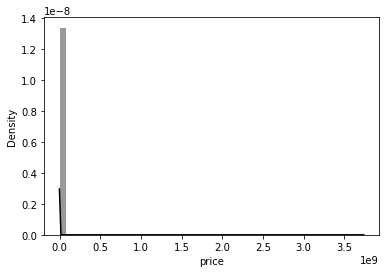

In [27]:
sns.distplot(car.price,color='black')
plt.show()

In [28]:
car.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.99,1])

count    7.894500e+04
mean     7.963075e+04
std      1.389771e+07
min      0.000000e+00
25%      4.950000e+03
50%      9.000000e+03
75%      1.750000e+04
85%      2.475000e+04
90%      2.990000e+04
99%      5.599500e+04
100%     3.736929e+09
max      3.736929e+09
Name: price, dtype: float64

In [29]:
car[car['price']>999999]['price']

29386     1111111111
68935        2000000
136516      17000000
137807     123456789
155421       1234567
219241       1111111
230753     135008900
307488     123456789
318592    3736928711
Name: price, dtype: int64

In [30]:
car=car[car['price']<=999999]

In [31]:
# car=car[car['price']<np.percentile(car['price'],99)]

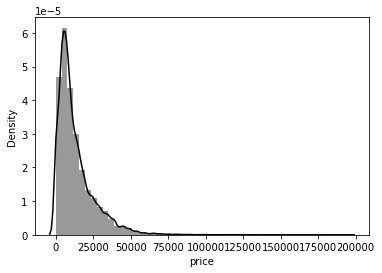

In [32]:
sns.distplot(car.price,color='black')
plt.show()

In [33]:
car.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.99,1])

count     78936.000000
mean      13113.679196
std       12505.109690
min           0.000000
25%        4950.000000
50%        9000.000000
75%       17500.000000
85%       24686.250000
90%       29900.000000
99%       55900.000000
100%     195000.000000
max      195000.000000
Name: price, dtype: float64

In [34]:
# sns.distplot(car.odometer,color='black')
# plt.show()

In [35]:
# car['odometer'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.99,0.995,0.9990,1])

In [36]:
# car[car['odometer']>2e+06]['odometer']

In [37]:
# car=car[car['odometer']<2e+06]

In [38]:
# sns.distplot(car.odometer,color='black')
# plt.show()

In [39]:
car['model'].nunique()

9479

In [40]:
car['region'].nunique()

403

In [41]:
car['model_counts']=car['model'].map(car['model'].value_counts())
car['region_counts']=car['region'].map(car['region'].value_counts())

In [42]:
car.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,post_month,model_counts,region_counts
31,auburn,15000,2013,ford,f-150 xlt,4,6,gas,128000,6,automatic,rwd,4,truck,black,al,5,126,12
55,auburn,19900,2004,ford,f250 super duty,3,8,diesel,88000,6,automatic,4wd,4,pickup,blue,al,4,168,12
59,auburn,14000,2012,honda,odyssey,4,6,gas,95000,6,automatic,fwd,4,mini-van,silver,al,4,279,12
65,auburn,22500,2001,ford,f450,3,8,diesel,144700,6,manual,rwd,4,truck,white,al,4,35,12
73,auburn,15000,2017,dodge,charger rt 4dr sedan,4,8,gas,90000,5,automatic,rwd,3,sedan,grey,al,4,1,12


In [43]:
car['model_rarity'] = car['model_counts'].rank(method='min').apply(lambda x: 100.0-100.0*(x-1)/(car['model_counts'].size-1))
car['region_availability'] = car['region_counts'].rank(method='max').apply(lambda x: 100.0*(x-1)/(car['region_counts'].size-1))

In [44]:
#car['model_counts'].loc[car.model_counts!=1].describe(percentiles = [0.20,0.40,0.60,0.80,1])

In [45]:
# def model_r(car):
#     if car['model_counts']==1:
#         return 6
#     elif car['model_counts']<=12:
#         return 5
#     elif car['model_counts']<=40:
#         return 4
#     elif car['model_counts']<=76:
#         return 3
#     elif car['model_counts']<=129:
#         return 2
#     elif car['model_counts']<=302:
#         return 1
#     return 0

# car['model_rarity']=car.apply(lambda car: model_r(car), axis=1)

In [46]:
car['manufacturer'].unique()

array(['ford', 'honda', 'dodge', 'chrysler', 'toyota', 'chevrolet',
       'jeep', 'lexus', 'bmw', 'gmc', 'mercedes-benz', 'mazda', 'ram',
       'nissan', 'ferrari', 'audi', 'mitsubishi', 'infiniti',
       'volkswagen', 'kia', 'hyundai', 'fiat', 'acura', 'cadillac',
       'lincoln', 'jaguar', 'saturn', 'volvo', 'alfa-romeo', 'buick',
       'subaru', 'mini', 'pontiac', 'rover', 'porsche', 'harley-davidson',
       'mercury', 'datsun', 'land rover', 'aston-martin', 'tesla'],
      dtype=object)

In [47]:
car['state'].unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

In [48]:
car['paint_color'].unique()

array(['black', 'blue', 'silver', 'white', 'grey', 'yellow', 'red',
       'green', 'brown', 'custom', 'purple', 'orange'], dtype=object)

In [49]:
car.rename(columns={'title_status':'status','fuel':'fuel_type','odometer':'odometer_reading','cylinders':'cylinder_number','drive':'drive_type','type':'body_type'},inplace=True)

In [50]:
car.drop(['post_month','model','state','region','model_counts','region_counts'], axis=1, inplace=True)

In [51]:
car.loc[car.duplicated()]

,price,year,manufacturer,condition,cylinder_number,fuel_type,odometer_reading,status,transmission,drive_type,size,body_type,paint_color,model_rarity,region_availability
570,19888,2015,mercedes-benz,4,6,gas,111261,6,automatic,4wd,4,SUV,silver,87.734212,37.666434
571,31888,2015,gmc,3,8,gas,109947,6,automatic,rwd,4,SUV,white,85.671755,37.666434
580,16888,2008,toyota,3,6,gas,188096,6,automatic,4wd,3,SUV,yellow,68.290365,37.666434
629,16888,2008,toyota,3,6,gas,188096,6,automatic,4wd,3,SUV,yellow,68.290365,37.666434
651,8950,2011,ford,4,6,gas,164000,6,automatic,fwd,4,truck,white,2.072591,37.666434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,23495,2015,ford,5,8,gas,146795,6,automatic,4wd,4,truck,black,54.684234,17.111547
426788,12995,2016,chevrolet,5,4,gas,61127,6,automatic,fwd,1,sedan,silver,40.486476,17.111547
426792,32999,2014,ford,4,8,diesel,154642,6,automatic,4wd,4,pickup,brown,93.810097,17.111547
426793,15999,2018,chevrolet,4,4,gas,36465,6,automatic,fwd,3,sedan,black,85.671755,17.111547


In [52]:
car.drop_duplicates()

,price,year,manufacturer,condition,cylinder_number,fuel_type,odometer_reading,status,transmission,drive_type,size,body_type,paint_color,model_rarity,region_availability
31,15000,2013,ford,4,6,gas,128000,6,automatic,rwd,4,truck,black,38.809147,0.249572
55,19900,2004,ford,3,8,diesel,88000,6,automatic,4wd,4,pickup,blue,31.232026,0.249572
59,14000,2012,honda,4,6,gas,95000,6,automatic,fwd,4,mini-van,silver,22.101729,0.249572
65,22500,2001,ford,3,8,diesel,144700,6,manual,rwd,4,truck,white,60.045607,0.249572
73,15000,2017,dodge,4,8,gas,90000,5,automatic,rwd,3,sedan,grey,100.000000,0.249572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426784,24995,2014,gmc,3,8,gas,128722,6,automatic,4wd,4,truck,white,23.143092,17.111547
426808,18000,2005,chevrolet,4,8,gas,130000,3,automatic,4wd,4,truck,blue,47.716476,17.111547
426809,18000,1990,jeep,3,8,gas,114400,6,automatic,4wd,4,SUV,black,100.000000,17.111547
426831,9800,1985,nissan,5,6,gas,115000,6,automatic,rwd,2,hatchback,red,82.038386,17.111547


In [53]:
car.reset_index(drop=True, inplace=True)

In [54]:
car.head()

,price,year,manufacturer,condition,cylinder_number,fuel_type,odometer_reading,status,transmission,drive_type,size,body_type,paint_color,model_rarity,region_availability
0,15000,2013,ford,4,6,gas,128000,6,automatic,rwd,4,truck,black,38.809147,0.249572
1,19900,2004,ford,3,8,diesel,88000,6,automatic,4wd,4,pickup,blue,31.232026,0.249572
2,14000,2012,honda,4,6,gas,95000,6,automatic,fwd,4,mini-van,silver,22.101729,0.249572
3,22500,2001,ford,3,8,diesel,144700,6,manual,rwd,4,truck,white,60.045607,0.249572
4,15000,2017,dodge,4,8,gas,90000,5,automatic,rwd,3,sedan,grey,100.000000,0.249572


In [55]:
car.tail()

,price,year,manufacturer,condition,cylinder_number,fuel_type,odometer_reading,status,transmission,drive_type,size,body_type,paint_color,model_rarity,region_availability
78931,18000,2005,chevrolet,4,8,gas,130000,3,automatic,4wd,4,truck,blue,47.716476,17.111547
78932,18000,1990,jeep,3,8,gas,114400,6,automatic,4wd,4,SUV,black,100.000000,17.111547
78933,9800,1985,nissan,5,6,gas,115000,6,automatic,rwd,2,hatchback,red,82.038386,17.111547
78934,6800,1997,jaguar,3,8,gas,69550,6,automatic,rwd,1,convertible,white,82.038386,17.111547
78935,0,2018,ram,4,6,diesel,20492,6,automatic,4wd,4,truck,white,8.985874,17.111547


In [56]:
car.to_csv('D:/Workspace/Projects/UsedCarPricePrediction/Data/vehicles_cleaned.csv')